In [132]:
import argparse
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [133]:
g = nx.read_gpickle("../tmp/condition_multigraph.nxp")
g

In [134]:
de = [ i[1] for i in g.degree()]

In [135]:
interaction_entropies = dict()
fitness_entropies = dict()
hubiness = dict()

properties = dict()

for u in g.adj:
    by_condition = {}
    all_partners = []
    for v in g.adj[u]:
        all_partners.append(v)
        datar = g.get_edge_data(u,v)
        for id,each_edge in datar.items():
            try:
                by_condition[each_edge['condition']].append(float(each_edge['fitness']))
            except:
                by_condition[each_edge['condition']] = [float(each_edge['fitness'])]
    hubiness[u] = len(all_partners) >= 3
    max_interactions = 0
    max_fitness_sum = 0
    for condition in by_condition:
        if len(by_condition[condition]) > max_interactions:
            max_interactions = len(by_condition[condition])
        if np.sum(by_condition[condition]) > max_fitness_sum:
            max_fitness_sum = np.sum(by_condition[condition])
    interaction_entropy = 0
    for condition in by_condition:
        frac = len(by_condition[condition]) / max_interactions
        interaction_entropy += -frac*np.log2(frac)
    interaction_entropies[u] = interaction_entropy
    fitness_entropy = 0
    for condition in by_condition:
        frac = np.sum(by_condition[condition]) / max_fitness_sum
        fitness_entropy += -frac*np.log2(frac)
    fitness_entropies[u] = fitness_entropy
    properties[u] = {'degree':len(all_partners),'hubiness':hubiness[u],'interaction_entropy':interaction_entropies[u],'fitness_entropy':fitness_entropies[u]}

In [136]:
nx.set_node_attributes(g,properties)

In [137]:
nx.write_graphml(g,"../tmp/annotated_multigraph.graphml")

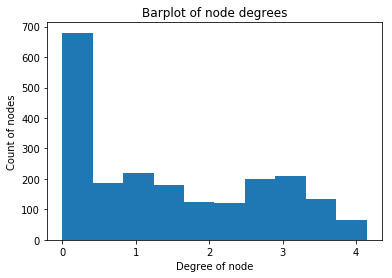

In [138]:
hist = plt.figure()
plt.hist([i for k,i in interaction_entropies.items()])
#plt.semilogx()
plt.title("Barplot of node degrees")
plt.ylabel("Count of nodes")
plt.xlabel("Degree of node")
hist.show()
hist.savefig("../tmp/interaction_entropies_hist.png")

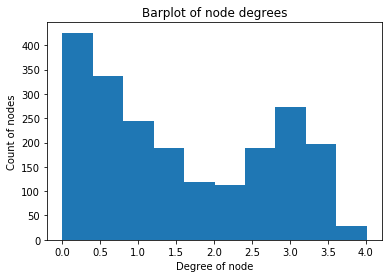

In [139]:
hist = plt.figure()
plt.hist([i for k,i in fitness_entropies.items()])
#plt.semilogx()
plt.title("Barplot of node degrees")
plt.ylabel("Count of nodes")
plt.xlabel("Degree of node")
hist.show()
hist.savefig("../tmp/interaction_entropies_hist.png")

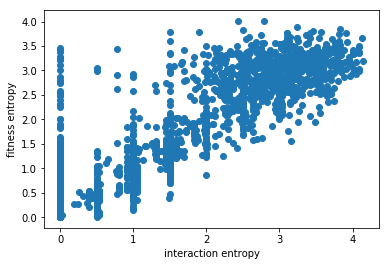

In [140]:
scatter = plt.figure()
plt.scatter([i for k,i in nx.get_node_attributes(g,'interaction_entropy').items()],
    [i for k,i in nx.get_node_attributes(g,'fitness_entropy').items()])
plt.xlabel("interaction entropy")
plt.ylabel("fitness entropy")
plt.show()

In [142]:
pos = nx.layout.spring_layout(g)

In [143]:
np.max([g.nodes[k]['interaction_entropy'] for k in g.nodes])

4.143578022184338

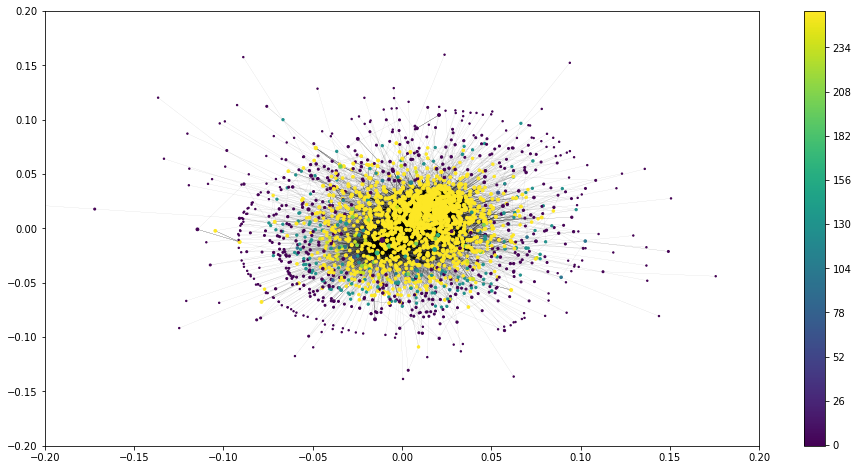

In [145]:
plt.figure(figsize=(16,8))
nodes = nx.draw_networkx_nodes(g, pos,
    node_size=np.log2(de)*2,
    node_color=[g.nodes[k]['interaction_entropy'] for k in g.nodes])
edges = nx.draw_networkx_edges(g, pos, width=0.1, alpha=0.2)
nodes.set_norm(matplotlib.colors.NoNorm())
plt.colorbar(nodes)
plt.legend()
axes = plt.gca()
axes.set_xlim([-.2,.2])
axes.set_ylim([-.2,.2])
plt.show()

In [148]:
comms = nx.algorithms.community.asyn_lpa_communities(g)

KeyboardInterrupt: 